In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sklearn.cross_validation
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
random.seed(123)
from sklearn.metrics import mean_squared_error

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
X = [x/10. for x in range(1, 1001, 1)]
beta0 = -3
beta1 = .78
y = [beta0 + beta1 * np.log(n) + random.random() for n in X]
data = pd.DataFrame({'y':y, 'X':X})

In [3]:
data['X2'] = data['X']**2
data['constant'] = 1

In [4]:
quadratic = smf.ols(formula = 'y ~ X2', data = data).fit()
y_pred = quadratic.predict(data[['constant','X2']])
quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     934.2
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          2.41e-145
Time:                        15:28:07   Log-Likelihood:                -903.71
No. Observations:                1000   AIC:                             1811.
Df Residuals:                     998   BIC:                             1821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3453      0.028    -12.169      0.000      -0.401      -0.290
X2             0.0002   6.34e-06     30.565      0.000       0.000       0.000
==============================================================================
Omnibus:                      462.487   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3305.163
Skew:                          -1.988   Prob(JB):                         0.00
Kurtosis:                      10.969   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Quadratic Fit to Log Data')

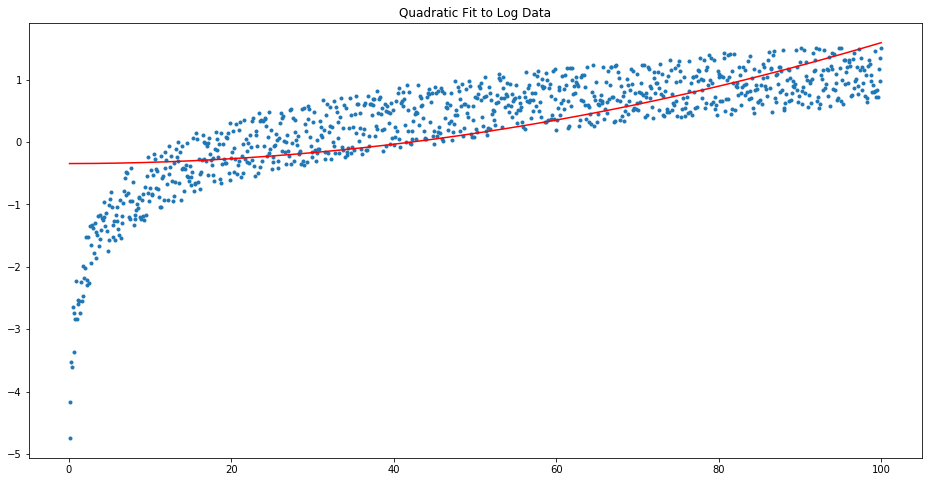

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data.X, data.y, '.', data.X, y_pred, 'r-')
plt.title('Quadratic Fit to Log Data')

In [6]:
data['logX'] = np.log(data['X'])

In [7]:
logmodel = smf.ols(formula = 'y ~ logX', data = data).fit()
y_pred = logmodel.predict(data[['constant','logX']])
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     7359.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:28:07   Log-Likelihood:                -171.52
No. Observations:                1000   AIC:                             347.0
Df Residuals:                     998   BIC:                             356.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5571      0.035    -74.034      0.000      -2.625      -2.489
logX           0.7919      0.009     85.783      0.000       0.774       0.810
==============================================================================
Omnibus:                      614.478   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.477
Skew:                           0.070   Prob(JB):                     2.00e-13
Kurtosis:                       1.824   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Logarithmic Fit to Log Data')

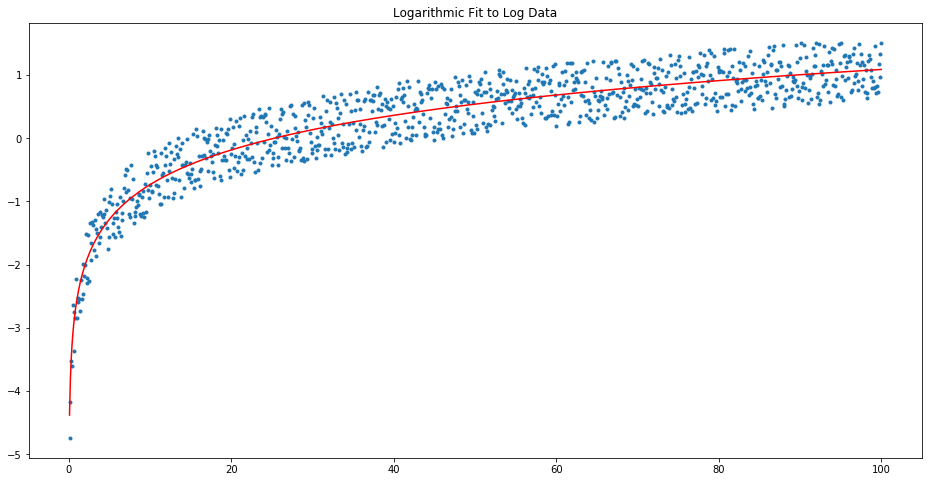

In [8]:
plt.figure(figsize=(16,8))
plt.plot(data.X, data.y, '.', data.X, y_pred, 'r-')
plt.title('Logarithmic Fit to Log Data')

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [113]:
X = [x for x in range(-10, 10, 1)]
beta0 = -2
beta1 = 5
beta2 = 0.5
y = [beta0 + beta1*n + beta2 * (n**2) + random.random() for n in X]
data = pd.DataFrame({'y':y, 'X':X, 'constant':1})
data['X2'] = data['X']**2

In [114]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(data[['constant', 'X', 'X2']], 
                                                                             data.y, train_size = 0.75)


In [115]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.317e+05
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           8.94e-27
Time:                        15:57:53   Log-Likelihood:                 1.4227
No. Observations:                  15   AIC:                             3.155
Df Residuals:                      12   BIC:                             5.279
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -1.4923      0.096    -15.554      0.000      -1.701      -1.283
X              4.9950      0.011    469.134      0.000       4.972       5.018
X2             0.4988      0.002    251.878      0.000       0.494       0.503
==============================================================================
Omnibus:                        2.415   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                1.393
Skew:                           0.468   Prob(JB):                        0.498
Kurtosis:                       1.837   Cond. No.                         73.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
y_train_pred = model.predict(x_train)
mean_squared_error(y_train, y_train_pred)

0.048433262636129903

In [117]:
y_test_pred = model.predict(x_test)
mean_squared_error(y_test, y_test_pred)

0.093260084267189278

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [138]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    #ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(data.X, data.y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-20, 125))
    ax.set_xlim((-50, 50))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version

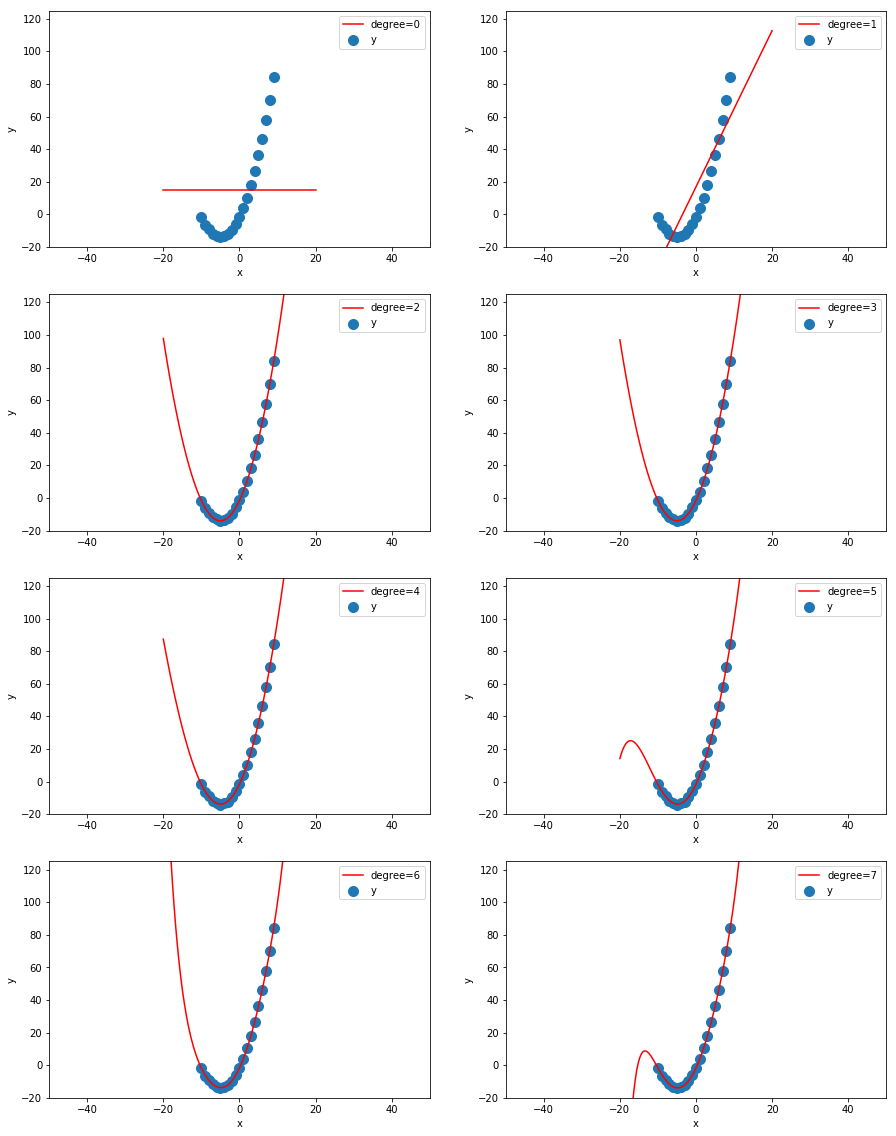

In [140]:

x_plot = np.linspace(-20,20,100)
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 20))
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    x_train, x_test, y_train, y_test = train_test_split(data.X[:,np.newaxis], 
                                                                             data.y, train_size = 0.75)
    est.fit(x_train, y_train)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

In [153]:
train_error = []
test_error = []
r_squared = []
aic = []

In [154]:
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    x_train, x_test, y_train, y_test = train_test_split(data.X[:,np.newaxis], 
                                                                             data.y, train_size = 0.75)
    est.fit(x_train, y_train)
    y_train_pred = est.predict(x_train)
    y_test_pred = est.predict(x_test)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    test_error.append(mean_squared_error(y_test, y_test_pred))
    r_squared.append(est.score(x_test,y_test))

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version

In [155]:
r_squared

[-0.33560465110910087,
 0.77323103170955665,
 0.99968212620546992,
 0.9998996330380866,
 0.99983466546334498,
 0.99992782636299105,
 0.99981891355400487,
 0.99975649711729042]

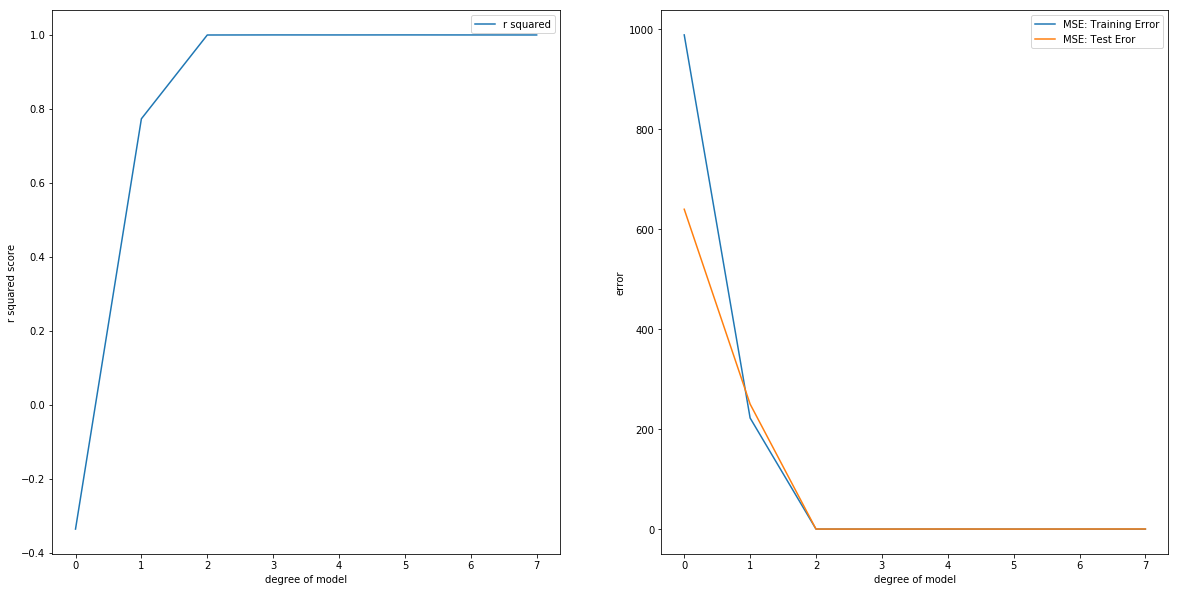

In [176]:
degrees = range(0,8)
fig,ax = plt.subplots(1,2, figsize = (20,10))
ax[0].plot(degrees,r_squared, label = 'r squared')
ax[1].plot(degrees,train_error, label = 'MSE: Training Error')
ax[1].plot(degrees,test_error, label = 'MSE: Test Eror')
ax[0].set_ylabel('r squared score')
ax[0].set_xlabel('degree of model')
ax[0].legend(loc='upper right',frameon=True)
ax[1].set_ylabel('error')
ax[1].set_xlabel('degree of model')
ax[1].legend(loc='upper right',frameon=True)


##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.